In [2]:
import pandas as pd
import numpy as np
import datetime as dt

In [3]:
# 'orders' table
orders = pd.read_csv(
    "https://www.dropbox.com/scl/fi/aous0qee7le68ar8pe5ol/JD_order_data.csv?rlkey=7zu1gc23v228yosjl1tpmc2xg&st=b8io8lhi&dl=1"
)

In [4]:
orders

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des
0,d0cf5cc6db,0abe9ef2ce,581d5b54c1,2018-03-01,2018-03-01 17:14:25.0,1,2,-,89.0,79.0,0.0,10.0,0.0,0.0,0,4,28
1,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,5.0,41.0,0.0,0.0,0,28,28
2,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,19.5,0.0,0.0,0.0,0,28,28
3,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,0.0,26.0,0.0,0.0,0,4,28
4,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,19.0,0.0,0.0,6.0,0,3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549984,3ad06b9fbe,a27b3ed4d4,a9109972d1,2018-03-31,2018-03-31 01:22:47.0,1,2,-,0.0,-1.0,0.0,0.0,0.0,1.0,1,2,2
549985,c9d77a7ed0,18f92434cd,7f53769d3f,2018-03-31,2018-03-31 08:55:57.0,1,1,3,118.0,55.0,63.0,0.0,0.0,0.0,0,59,2
549986,b9ad79338f,b5caf8a580,8dc4a01dec,2018-03-31,2018-03-31 13:31:01.0,1,1,2,78.0,78.0,0.0,0.0,0.0,0.0,0,2,2
549987,be3a9414b1,20ba6655f3,2dd6b818ec,2018-03-31,2018-03-31 12:51:18.0,1,2,-,189.0,78.0,111.0,0.0,0.0,0.0,0,4,28


In [5]:
# Create discount flags
orders["has_direct"] = orders["direct_discount_per_unit"] > 0
orders["has_quantity"] = orders["quantity_discount_per_unit"] > 0
orders["has_bundle"] = orders["bundle_discount_per_unit"] > 0
orders["has_coupon"] = orders["coupon_discount_per_unit"] > 0

In [6]:
# Count how many discount types are applied per row
orders["discount_count"] = orders[
    ["has_direct", "has_quantity", "has_bundle", "has_coupon"]
].sum(axis=1)

# Keep only non-stacked rows (<= 1 discount type)
orders_non_stacked = orders[orders["discount_count"] <= 1].copy()

In [7]:
# Label each row based on its discount type
def label_discount(row):
    if row["discount_count"] == 0:
        return "No Discount"
    elif row["has_direct"]:
        return "Direct Only"
    elif row["has_quantity"]:
        return "Quantity Only"
    elif row["has_bundle"]:
        return "Bundle Only"
    elif row["has_coupon"]:
        return "Coupon Only"


orders_non_stacked["discount_group"] = orders_non_stacked.apply(label_discount, axis=1)

# Show counts by type
print(orders_non_stacked["discount_group"].value_counts())

discount_group
Direct Only      176026
No Discount      159541
Quantity Only     37953
Coupon Only       21783
Bundle Only        5438
Name: count, dtype: int64


In [8]:
orders_non_stacked.columns

Index(['order_ID', 'user_ID', 'sku_ID', 'order_date', 'order_time', 'quantity',
       'type', 'promise', 'original_unit_price', 'final_unit_price',
       'direct_discount_per_unit', 'quantity_discount_per_unit',
       'bundle_discount_per_unit', 'coupon_discount_per_unit', 'gift_item',
       'dc_ori', 'dc_des', 'has_direct', 'has_quantity', 'has_bundle',
       'has_coupon', 'discount_count', 'discount_group'],
      dtype='object')

In [9]:
columns_to_keep = [
    "order_ID",
    "user_ID",
    "sku_ID",
    "order_date",
    "order_time",
    "quantity",
    "original_unit_price",
    "final_unit_price",
    "direct_discount_per_unit",
    "quantity_discount_per_unit",
    "bundle_discount_per_unit",
    "coupon_discount_per_unit",
    "discount_group",
]

df_analysis = orders_non_stacked[columns_to_keep].copy()
df_analysis

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,discount_group
0,d0cf5cc6db,0abe9ef2ce,581d5b54c1,2018-03-01,2018-03-01 17:14:25.0,1,89.0,79.0,0.0,10.0,0.0,0.0,Quantity Only
2,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,78.0,58.5,19.5,0.0,0.0,0.0,Direct Only
3,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,61.0,35.0,0.0,26.0,0.0,0.0,Quantity Only
6,89286e5fd9,79154d0001,6717b7c979,2018-03-01,2018-03-01 22:18:41.0,1,0.0,0.0,0.0,0.0,0.0,0.0,No Discount
7,72585b87a6,d5e8910932,d829f03a28,2018-03-01,2018-03-01 15:28:49.0,2,79.9,40.9,0.0,39.0,0.0,0.0,Quantity Only
...,...,...,...,...,...,...,...,...,...,...,...,...,...
549984,3ad06b9fbe,a27b3ed4d4,a9109972d1,2018-03-31,2018-03-31 01:22:47.0,1,0.0,-1.0,0.0,0.0,0.0,1.0,Coupon Only
549985,c9d77a7ed0,18f92434cd,7f53769d3f,2018-03-31,2018-03-31 08:55:57.0,1,118.0,55.0,63.0,0.0,0.0,0.0,Direct Only
549986,b9ad79338f,b5caf8a580,8dc4a01dec,2018-03-31,2018-03-31 13:31:01.0,1,78.0,78.0,0.0,0.0,0.0,0.0,No Discount
549987,be3a9414b1,20ba6655f3,2dd6b818ec,2018-03-31,2018-03-31 12:51:18.0,1,189.0,78.0,111.0,0.0,0.0,0.0,Direct Only


## Clean Click Data

In [10]:
# Load click data
clicks = pd.read_csv("JD_click_data.csv")

# Convert time column to datetime
clicks["request_time"] = pd.to_datetime(clicks["request_time"])

# Drop rows with missing user_ID
clicks = clicks[clicks["user_ID"].notna()].copy()

# Keep only one click per user-SKU pair
clicks.sort_values(by="request_time", ascending=False, inplace=True)
clicks = clicks.drop_duplicates(subset=["user_ID", "sku_ID"], keep="first").copy()

clicks.head()

,sku_ID,user_ID,request_time,channel
19570832,068f4481b3,0e638b6bd6,2018-03-31 23:59:01,app
19821277,5e48179187,b29ffb6e7a,2018-03-31 23:59:01,others
19530468,68c4d8ccbc,74cdfe7e15,2018-03-31 23:59:01,app
20021756,14dd743b19,09f5a5f56b,2018-03-31 23:59:01,app
20009730,8dc4a01dec,8baa3cc723,2018-03-31 23:59:00,app


## Merge Clicks with Orders Data

In [11]:
# Ensure df_analysis has one promo type per sku_ID
promo_info = (
    df_analysis
    .drop_duplicates(subset=["sku_ID"])
    .loc[:, ["sku_ID", "discount_group"]]
    .copy()
)

# Merge click data with promo labels
clicks_merged = clicks.merge(promo_info, on="sku_ID", how="left")

clicks_merged["discount_group"].value_counts()

discount_group
Direct Only      4508351
No Discount      1778150
Quantity Only     956557
Coupon Only       352158
Bundle Only        13982
Name: count, dtype: int64

## Mark Purchases and Build Final Dataset

In [12]:
# Create purchase lookup table from df_analysis
purchases = (
    df_analysis
    .drop_duplicates(subset=["user_ID", "sku_ID"])
    .assign(converted=1)
    .loc[:, ["user_ID", "sku_ID", "converted"]]
)

# Merge with click dataset to label conversions
conversion_df = clicks_merged.merge(purchases, on=["user_ID", "sku_ID"], how="left")
conversion_df["converted"] = conversion_df["converted"].fillna(0).astype(int)

# Ensure 'discount_group' is categorical and ordered
conversion_df["discount_group"] = conversion_df["discount_group"].astype("category")
conversion_df["discount_group"] = conversion_df["discount_group"].cat.reorder_categories(
    ["No Discount", "Direct Only", "Coupon Only", "Quantity Only", "Bundle Only"],
    ordered=True
)

# Drop rows with missing discount_group
conversion_df = conversion_df.dropna(subset=["discount_group"]).copy()

# Final check
conversion_df[["user_ID", "sku_ID", "converted", "discount_group"]].head()


,user_ID,sku_ID,converted,discount_group
0,0e638b6bd6,068f4481b3,1,Direct Only
1,b29ffb6e7a,5e48179187,0,Direct Only
2,74cdfe7e15,68c4d8ccbc,0,Coupon Only
3,09f5a5f56b,14dd743b19,0,Direct Only
4,8baa3cc723,8dc4a01dec,0,Direct Only


## Run Fixed Effects Regression

In [13]:
import pandas as pd
from linearmodels.panel import PanelOLS

# Sort and create synthetic time index
conversion_df = (
    conversion_df
    .sort_values(by=["user_ID", "sku_ID"])
    .reset_index(drop=True)
    .copy()
)

conversion_df["click_index"] = conversion_df.groupby("user_ID").cumcount()

# Set panel index (entity = user_ID, time = synthetic click index)
conversion_df = conversion_df.set_index(["user_ID", "click_index"])

# Create dummy variables for treatment (reference = No Discount)
conversion_df["discount_group"] = conversion_df["discount_group"].astype("category")
conversion_df["discount_group"] = conversion_df["discount_group"].cat.reorder_categories(
    ["No Discount", "Direct Only", "Coupon Only", "Quantity Only", "Bundle Only"],
    ordered=True
)
X = pd.get_dummies(conversion_df["discount_group"], drop_first=True)

# Define outcome variable
y = conversion_df["converted"]

# Fit PanelOLS model with user fixed effects
model = PanelOLS(y, X, entity_effects=True)
results = model.fit()

print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:              converted   R-squared:                        0.0002
Estimator:                   PanelOLS   R-squared (Between):             -0.0111
No. Observations:             7609198   R-squared (Within):               0.0002
Date:                Wed, Apr 23 2025   R-squared (Overall):             -0.0085
Time:                        18:15:19   Log-likelihood                 4.054e+06
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      247.64
Entities:                     2467439   P-value                           0.0000
Avg Obs:                       3.0838   Distribution:               F(4,5141755)
Min Obs:                       1.0000                                           
Max Obs:                       8202.0   F-statistic (robust):             247.64
                            

In [20]:
print(results.summary.tables[0].as_text())


                          PanelOLS Estimation Summary                           
Dep. Variable:              converted   R-squared:                        0.0002
Estimator:                   PanelOLS   R-squared (Between):             -0.0111
No. Observations:             7609198   R-squared (Within):               0.0002
Date:                Wed, Apr 23 2025   R-squared (Overall):             -0.0085
Time:                        18:15:19   Log-likelihood                 4.054e+06
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      247.64
Entities:                     2467439   P-value                           0.0000
Avg Obs:                       3.0838   Distribution:               F(4,5141755)
Min Obs:                       1.0000                                           
Max Obs:                       8202.0   F-statistic (robust):             247.64
                            

In [21]:
print(results.summary.tables[1].as_text())


                               Parameter Estimates                               
               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------
Direct Only      -0.0054     0.0002    -27.859     0.0000     -0.0058     -0.0051
Coupon Only      -0.0070     0.0004    -17.334     0.0000     -0.0078     -0.0062
Quantity Only    -0.0056     0.0003    -20.167     0.0000     -0.0062     -0.0051
Bundle Only      -0.0209     0.0017    -12.173     0.0000     -0.0243     -0.0176


## Visualize the Effects

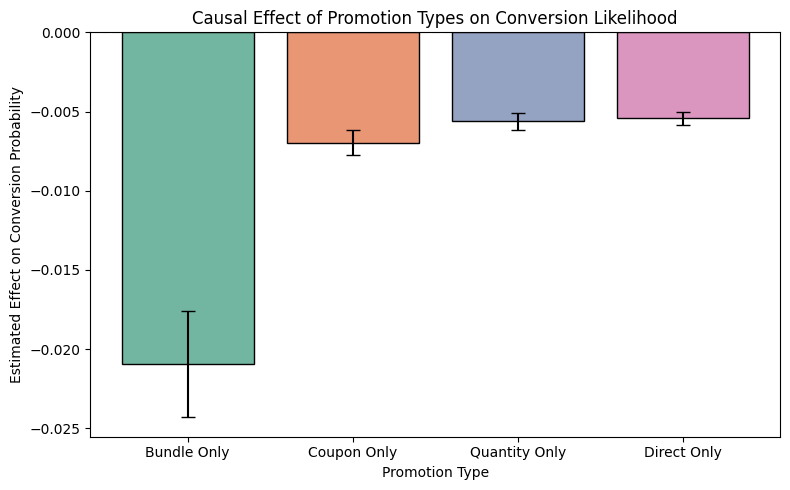

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract estimated coefficients and confidence intervals
coef_table = results.params.to_frame(name="coef")
conf_int = results.conf_int()
conf_int.columns = ["ci_lower", "ci_upper"]

# Merge everything into a single DataFrame
coef_table = coef_table.join(conf_int)
coef_table = coef_table.reset_index().rename(columns={"index": "promotion_type"})

# Keep only promo coefficients (filter out user_ID and sku_ID)
promo_effects = coef_table[coef_table["promotion_type"].str.contains("Direct|Coupon|Quantity|Bundle")].copy()
promo_effects["promotion_type"] = promo_effects["promotion_type"].str.replace("C\\(discount_group\\)\\[T.", "", regex=True).str.replace("]", "")

# Sort by effect size for cleaner plot
promo_effects = promo_effects.sort_values("coef")

# Plot
palette = sns.color_palette("Set2", n_colors=4)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=promo_effects,
    x="promotion_type",
    y="coef",
    hue="promotion_type",
    palette=palette,
    edgecolor="black",
    legend=False
)

plt.errorbar(
    x=range(len(promo_effects)),
    y=promo_effects["coef"],
    yerr=[promo_effects["coef"] - promo_effects["ci_lower"], promo_effects["ci_upper"] - promo_effects["coef"]],
    fmt='none',
    capsize=5,
    color='black',
)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Estimated Effect on Conversion Probability")
plt.xlabel("Promotion Type")
plt.title("Causal Effect of Promotion Types on Conversion Likelihood")
plt.tight_layout()
plt.show()

